**Parcial 2_ Evelyn Dayana Zagarra Piedrahita **



I) The period of a pendulum of length l oscillating at a large angle $\alpha$ is given by
$$
T=T_{0} \frac{\sqrt{2}}{\pi} \int_{0}^{\alpha} \frac{d \theta}{(\cos \theta-\cos \alpha)^{\frac{1}{2}}}
$$
where
$$
T_{0}=2 \pi \sqrt{\frac{l}{g}}
$$
is the period of the same pendulum at small amplitudes. Any numerical evaluation of the integral as is would fail (explain why). If we change the variable by writing:
$$
\sin \frac{\theta}{2}=\sin \frac{\alpha}{2} \sin \phi
$$
we can get:
$$
T=\frac{2 T_{0}}{\pi} \int_{0}^{\frac{\pi}{2}} \frac{d \phi}{\left(1-\sin ^{2} \frac{\alpha}{2} \sin ^{2} \phi\right)^{\frac{1}{2}}}
$$
which is a well-behaved integral. Write a program to use the above integral to calculate the ratio $T/T_0$ for integral amplitudes $0^\circ \le\alpha \le 90^\circ$. Output these values as a pandas dataframe showing the amplitude in degrees and radians as well as $T/T_0$, and make a plot with the two columns. Explain the result when $\alpha = 0.$ 

Vamon a utilizar el numero de cedula como punto inicial del generador de numeros aleatorios.

In [86]:
from scipy import interpolate
import numpy as np
from scipy.misc import derivative
import matplotlib.pyplot as plt
from scipy import integrate
import pandas as pd


In [147]:
def T0(l,g=9.8):
  return 2*np.pi*np.sqrt(l/g)
def T(b,l,g=9.8):
  b=np.asarray(b)
  Z=np.sin(b/2)
  return (2*T0(l,g)/np.pi)*integrate.quad(lambda Φ:1/(np.sqrt(1-Z**2*np.sin(Φ)**2)),0,np.pi/2)[0]

In [113]:
#Para poder usar el conjunto de valores de α necesito vectorizar T
T_V=np.vectorize(T)
#tomemos la longitud como uno para poder trabajar
l=1

In [148]:
#definimos los valores para α
b = np.linspace(0,np.pi/2,50)
#Evaluando la integral para cada uno de los angulos alpha, y hacemos arreglo para guardar los valores de la integral
integral = np.zeros(len(b)) 


In [149]:
#debemos definir los limites de la integral
x_1=0
x_2=np.pi/2
for i in range(0, len(b)):
  integral[i] = T(b[i], x_1, x_2)

In [150]:
T_T0 = (2/np.pi)*integral
T_T0

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [151]:
#debemos definir una lista con la longitud de α 
T0l = np.ones(b.shape[0])*T0(1)
T0l

array([2.00708992, 2.00708992, 2.00708992, 2.00708992, 2.00708992,
       2.00708992, 2.00708992, 2.00708992, 2.00708992, 2.00708992,
       2.00708992, 2.00708992, 2.00708992, 2.00708992, 2.00708992,
       2.00708992, 2.00708992, 2.00708992, 2.00708992, 2.00708992,
       2.00708992, 2.00708992, 2.00708992, 2.00708992, 2.00708992,
       2.00708992, 2.00708992, 2.00708992, 2.00708992, 2.00708992,
       2.00708992, 2.00708992, 2.00708992, 2.00708992, 2.00708992,
       2.00708992, 2.00708992, 2.00708992, 2.00708992, 2.00708992,
       2.00708992, 2.00708992, 2.00708992, 2.00708992, 2.00708992,
       2.00708992, 2.00708992, 2.00708992, 2.00708992, 2.00708992])

In [152]:
T_V(b,l)

array([2.00708992, 2.00721884, 2.00760569, 2.00825075, 2.00915447,
       2.01031748, 2.01174063, 2.01342491, 2.01537153, 2.01758189,
       2.02005757, 2.02280035, 2.02581222, 2.02909538, 2.03265222,
       2.03648536, 2.04059763, 2.04499211, 2.04967209, 2.05464112,
       2.05990297, 2.0654617 , 2.07132163, 2.07748734, 2.08396372,
       2.09075595, 2.09786952, 2.10531026, 2.11308433, 2.12119826,
       2.12965894, 2.13847367, 2.14765015, 2.15719654, 2.16712145,
       2.17743395, 2.18814368, 2.19926077, 2.21079596, 2.22276059,
       2.23516667, 2.24802688, 2.26135464, 2.2751642 , 2.28947059,
       2.30428981, 2.31963878, 2.33553549, 2.35199903, 2.36904972])

In [153]:
T_V(b,l)/T0l

array([1.        , 1.00006423, 1.00025697, 1.00057836, 1.00102862,
       1.00160808, 1.00231714, 1.0031563 , 1.00412618, 1.00522745,
       1.00646092, 1.00782747, 1.00932808, 1.01096386, 1.012736  ,
       1.0146458 , 1.01669467, 1.01888415, 1.02121588, 1.02369161,
       1.02631324, 1.02908279, 1.03200241, 1.03507437, 1.03830112,
       1.04168524, 1.04522946, 1.04893669, 1.05280999, 1.05685263,
       1.06106802, 1.06545982, 1.07003186, 1.07478819, 1.07973311,
       1.08487115, 1.0902071 , 1.09574601, 1.10149323, 1.10745441,
       1.11363554, 1.12004293, 1.12668327, 1.13356366, 1.14069159,
       1.14807502, 1.1557224 , 1.16364267, 1.17184537, 1.1803406 ])

In [154]:
#definamos Dataframe
df = pd.DataFrame({'Ang Degradanes': b, 'Ang radianes': b*180/np.pi, 'T_V/T0l':T_V(b,l)/T0l})
df

,Ang Degradanes,Ang radianes,T_V/T0l
0,0.000000,0.000000,1.000000
1,0.032057,1.836735,1.000064
2,0.064114,3.673469,1.000257
3,0.096171,5.510204,1.000578
4,0.128228,7.346939,1.001029
5,0.160285,9.183673,1.001608
6,0.192342,11.020408,1.002317
7,0.224399,12.857143,1.003156
8,0.256457,14.693878,1.004126
9,0.288514,16.530612,1.005227


para el angulo$$ b = 0 $$se tiene que el periodo es el mismo que para angulos pequeños

Veamos el grafico con las dos columnas

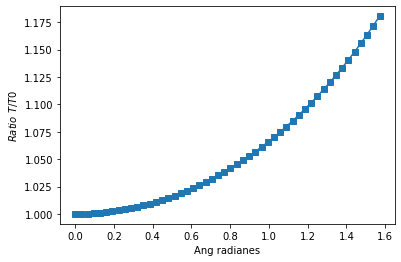

In [165]:
plt.plot(b,T_V(b,l)/T0l,'s-')
plt.xlabel("Ang radianes", size=10)
plt.ylabel('$Ratio$ $T/T0$', size =10)
plt.show()

II)
### Casas-Ibarra parameterization
Consider a $n\times n$ symmetric matrix $A$. We can assumme without lost of generality that this can be generated from a matrix $Y$ such that
$$
A=Y^{\operatorname{T}}Y
$$
Theorem 1 gurantees that exists an ortogonal matrix $U$ such that
$$
U^{\operatorname{T}} A U=U^{\operatorname{T}} Y^{\operatorname{T}}Y U=D_\lambda
$$
where
$$
D_{\lambda}=A_{\text{diag}}=\operatorname{diag}\left(\lambda_1,\lambda_2,\ldots,\lambda_n\right)
$$
where $\lambda_i$ are the eigenvalues of $A$. Therefore
\begin{align}
 Y^{\operatorname{T}}Y =&U D_\lambda U^{\operatorname{T}}\\
 =&U D_{\sqrt{\lambda}} D_{\sqrt{\lambda}} U^{\operatorname{T}}\\
\end{align}
where
$$
D_{\sqrt{\lambda}}=\operatorname{diag}\left(\sqrt{\lambda_1},\sqrt{\lambda_2},\ldots \sqrt{\lambda_n}\right)
$$
Therefore, exists an ortogonal arbitrary matrix $R$, such that
$$
 Y^{\operatorname{T}}Y =U D_{\sqrt{\lambda}}R^{\operatorname{T}}R D_{\sqrt{\lambda}} U^{\operatorname{T}}\\
$$

In this way, the matrix $Y$ can be parameterized in terms of $R$ as
$$
Y=R D_{\sqrt{\lambda}} U^{\operatorname{T}}
$$


1) By using the previous equations, build a matrix $Y$ $2\times 2$ with the following conditions
* $R$ is an orthogonal matrix with a mixing angle as a random number between $(0,2\pi)$. Use your identification number as the seed of the random number generator.
* The eigenvalues are $\lambda_1=2$ and $\lambda_2=4$. 
* $U$ is a diagonalization matrix with mixing angle $\pi/4$

2) Build the matrix $A$ and check that has the proper eigenvalues and eigenvectors

In [35]:
import sympy as sp
import numpy as np

In [36]:
np.random.seed(1152225738) 
S=np.random.uniform(0,2*np.pi) #numero aleatorio entre (0,2*pi)
S

6.124824778963418

Como tenemos que Los valores propios son λ1 = 2 y λ2 = 4, entonces:
nuestra matriz diagonal solo tendra dos valores propios lo que es:



In [40]:
M_D = np.sqrt(np.diag([2,4]))
#definimos las matrices como arreglos para poder operar con ellas
U = np.array([[np.cos(np.pi/4), -np.sin(np.pi/4)],[np.sin(np.pi/4), np.cos(np.pi/4)]]) 
R = np.array([[np.cos(S), -np.sin(S)],[np.sin(S), np.cos(S)]])
U_T = np.transpose(U)

Para Calcular Y, debemos utilizar 
$$
Y=R D_{\sqrt{\lambda}} U^{\operatorname{T}}
$$
que en mi caso tengo M_D, R, U_T

In [47]:
Y = np.dot( R, np.dot(M_D, U_T ))
Y # si lo vemos como un arreglo

array([[ 0.76446644,  1.21050787],
       [-1.55421719,  1.23881826]])

In [48]:
sp.Matrix(Y)

Matrix([
[0.764466436325221, 1.21050787206504],
[-1.55421718808287, 1.23881826418106]])

In [49]:
#definamos la transpuesta de Y que nos servira para hayar A
Y_T = np.transpose(Y)
Y_T

array([[ 0.76446644, -1.55421719],
       [ 1.21050787,  1.23881826]])

Sabemos que $$
A=Y^{\operatorname{T}}Y
$$
por lo cual podemos hallandola ya conociendo la transpuesta de Y, que es Y_T

In [53]:
#Veamos quien es A
A = np.dot(Y_T, Y)
sp.Matrix((A))

Matrix([
[ 3.0, -1.0],
[-1.0,  3.0]])

Debemos verificar que A tenga los valores y vectores propios correctos para eso debemos hallarlos primeramente con metodos de numpy

In [71]:
n, n_ = np.linalg.eig(A) # Con esto hallamos los autovalores primero y luego los autovectores 


In [72]:
n

array([4., 2.])

In [73]:
n_

array([[ 0.70710678,  0.70710678],
       [-0.70710678,  0.70710678]])

Luego necesitamos esos valores y vectores propios en forma matricial para poder hallar A, ya que utilizaremos producto punto

In [74]:
sp.Matrix(n)

Matrix([
[4.0],
[2.0]])

In [81]:
w = np.diag(n)
w

array([[4., 0.],
       [0., 2.]])

In [82]:
sp.Matrix(w) #para obtener como tal la matriz

Matrix([
[4.0, 0.0],
[0.0, 2.0]])

In [76]:
sp.Matrix(n_)

Matrix([
[ 0.707106781186547, 0.707106781186548],
[-0.707106781186548, 0.707106781186547]])

In [77]:
# Podemos redondear a un numero de cifras pertinentes con la funcion round, y considerando su alta precision anterior mostrada
sp.Matrix(n_.round(3))

Matrix([
[ 0.707, 0.707],
[-0.707, 0.707]])

In [79]:
#veamos la transpuesta de la matriz de vectores propios
ñ= n_.transpose()
ñ

array([[ 0.70710678, -0.70710678],
       [ 0.70710678,  0.70710678]])

In [84]:
# veamos si efectivamente los valores propios y vectores propios eran los correspondientes
k = np.dot(n_,np.dot(w,ñ))
k

array([[ 3., -1.],
       [-1.,  3.]])

In [85]:
sp.Matrix(k)

Matrix([
[ 3.0, -1.0],
[-1.0,  3.0]])